In [12]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import vlc 

In [14]:
SELECCION_DIR = "data/sound/else/"
FILE_TYPE=".mp3"

audioFiles = utils.findMusic(SELECCION_DIR, FILE_TYPE)
audioFiles

['data/sound/else/811.mp3',
 'data/sound/else/1265.mp3',
 'data/sound/else/1883.mp3',
 'data/sound/else/1614.mp3',
 'data/sound/else/250.mp3',
 'data/sound/else/1157.mp3',
 'data/sound/else/1585.mp3',
 'data/sound/else/1966.mp3',
 'data/sound/else/1657.mp3',
 'data/sound/else/43.mp3',
 'data/sound/else/943.mp3',
 'data/sound/else/957.mp3',
 'data/sound/else/649.mp3',
 'data/sound/else/733.mp3',
 'data/sound/else/31.mp3',
 'data/sound/else/1044.mp3',
 'data/sound/else/998.mp3',
 'data/sound/else/1297.mp3',
 'data/sound/else/920.mp3',
 'data/sound/else/1007.mp3',
 'data/sound/else/1437.mp3',
 'data/sound/else/910.mp3',
 'data/sound/else/26.mp3',
 'data/sound/else/67.mp3',
 'data/sound/else/925.mp3',
 'data/sound/else/1884.mp3',
 'data/sound/else/594.mp3',
 'data/sound/else/1652.mp3',
 'data/sound/else/1718.mp3',
 'data/sound/else/1119.mp3',
 'data/sound/else/297.mp3',
 'data/sound/else/397.mp3',
 'data/sound/else/180.mp3',
 'data/sound/else/108.mp3',
 'data/sound/else/356.mp3',
 'data/so

In [6]:
positions = np.genfromtxt("audioDataMFCCElse.tsv")
positions = positions[:,0:2]
positions

array([[-36.38262939,  24.00021553],
       [-35.44454193,  23.05650139],
       [-36.270504  ,  23.83163643],
       ..., 
       [-36.33289337,  23.88725281],
       [-36.08835983,  23.73071861],
       [-35.78953552,  23.29817772]])

### Scatterplot

<IPython.core.display.Javascript object>


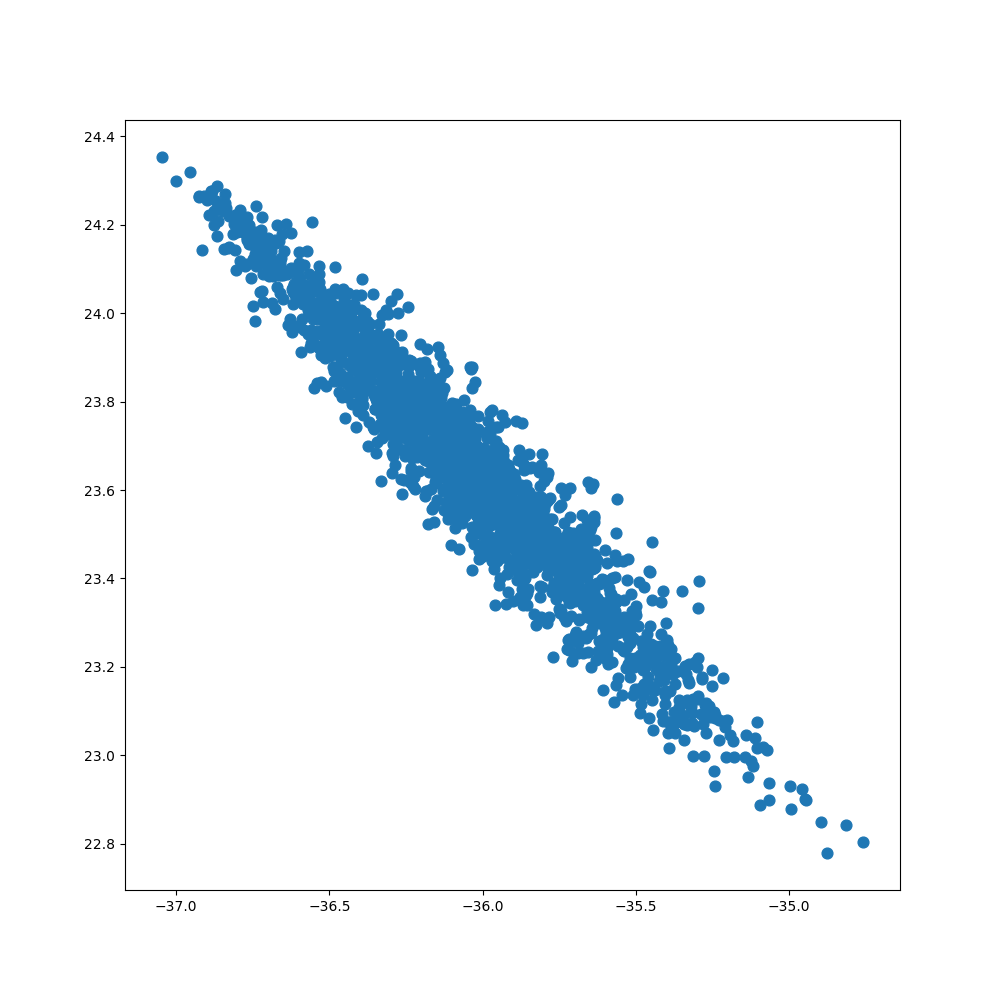

In [24]:
# para debuggear
#
import sys
nb_stdout = sys.stdout
sys.stdout = open('/dev/stdout', 'w')

from scipy.spatial import distance as dist

THRESHOLD = 0.942

%matplotlib notebook

#import sounddevice as sd
#sd.default.samplerate = SAMPLE_RATE
#sd.default.device = 18

def pointClicked(event):
    fileToPlay = None
    
    if ( event.xdata == None ):
        return
    
    for i in range(0, positions.shape[0]):
        if dist.euclidean( positions[i,:], np.array( (event.xdata,event.ydata) ) ) < THRESHOLD/100:
            print("Hay punto")
            fileToPlay = audioFiles[i]
            #fileToPlayData, fileToPlaySampleRate = librosa.core.load(fileToPlay, sr = None)
            #sound = matrixAudioData[i]
            #ound = matrixAudioDataNoFFT[i]
            
    if fileToPlay != None:
        vlc.MediaPlayer(fileToPlay).play()
        #sd.play(fileToPlayData, fileToPlaySampleRate, blocking = True)
        

fig = plt.figure(figsize=(10, 10))
#plt.scatter(positions[:,0], positions[:,1], s=60, c=cutTree)
plt.scatter(positions[:,0], positions[:,1], s=60)


# for x, y, cluster, _ in output:
#     plt.annotate(str(cluster), (x,y))


fig.canvas.mpl_connect('button_press_event', pointClicked )



plt.show()

### Espectrogramas Promedio por cluster

In [157]:
import scipy.stats

espectrogramasPromedio = []
espectrogramasMediana = []

for cluster in range(0, cantClusters):
    npAudioFiles = np.array( audioFiles )[ output[:,2] == str(cluster) ]
    espectrogramasPromedioPre = []
    # espectrogramasPromedio[0] = np

    for i in range(0, npAudioFiles.size ):
    #     
        y, sr = librosa.load(npAudioFiles[i], sr = SAMPLE_RATE)

        y.resize(ceil(SAMPLE_RATE * SEGUNDOS_FILA))

        D = librosa.stft(y)

        spectrogramData = librosa.logamplitude(np.abs(D)**2, ref_power=np.max)

        espectrogramasPromedioPre.append(spectrogramData)


    #     plt.title('Power spectrogram')
    #     plt.colorbar(format='%+2.0f dB')
    #     matplotlib.pyplot.savefig(ESPECTROGRAMA_SAVE_TO + str(i) + ".png", bbox_inches='tight')
    #     plt.close(fig)
    #     plt.show()
    #     break

    espectrogramasPromedio.append( np.average( espectrogramasPromedioPre, axis = 0 ) )
    espectrogramasMediana.append( np.median( espectrogramasPromedioPre, axis = 0 ) )
    

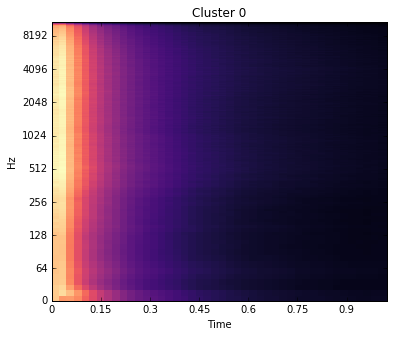

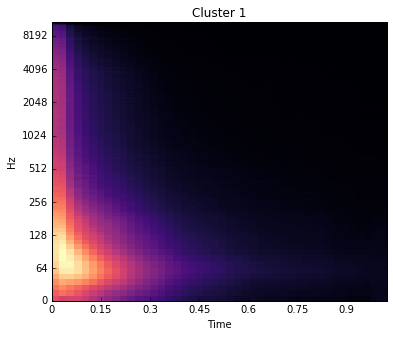

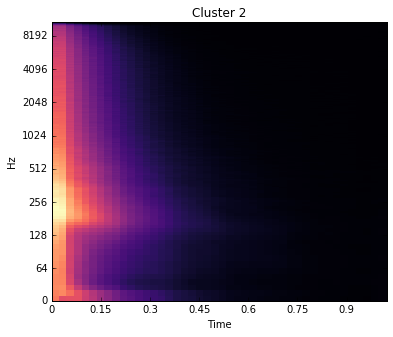

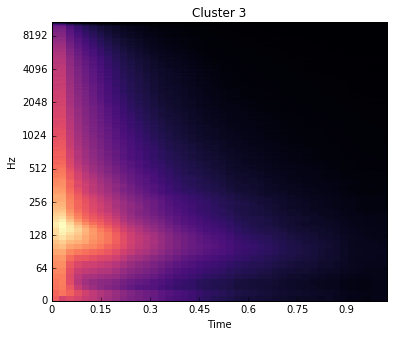

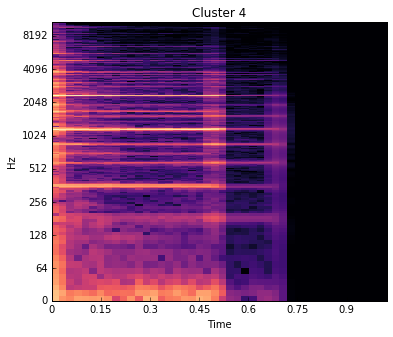

In [169]:
%matplotlib inline

# subplt = plt.subplot(3, 3, 2)

# row and column sharing
# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(3, 3, sharex='col', sharey='row')
# f, plotMatrix = plt.subplots(3, 3, sharex='col', sharey='row')
# currentCluster = 0

# for tresPlots in plotMatrix:
#     for plot in tresPlots:
#         if currentCluster < cantClusters:
#             plot.plot( librosa.display.specshow(espectrogramasPromedio[currentCluster],y_axis='log', x_axis='time') )
#             currentCluster+=1;

# ax1.plot(x, y)
# ax2.scatter(x, y)
# ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')

for cluster in range(0, cantClusters):
    fig = plt.figure(figsize=(6, 5))
    librosa.display.specshow(espectrogramasPromedio[cluster],y_axis='log', x_axis='time')
    plt.title('Cluster ' + str(cluster))

plt.show()

In [119]:
espectrogramasPromedio = []

for i in range(0,cantClusters) :
    
    average = np.average( librosa.logamplitude( matrixAudioData [ output[:,2] == "0", :], ref_power=np.max ), axis = 1 )
    espectrogramasPromedio.append( average )

espectrogramasPromedio

[array([ 5078.30224609,  3447.45825195,  5857.99023438, ...,  5861.7890625 ,
         5505.09375   ,  4553.72509766], dtype=float32),
 array([ 5078.30224609,  3447.45825195,  5857.99023438, ...,  5861.7890625 ,
         5505.09375   ,  4553.72509766], dtype=float32),
 array([ 5078.30224609,  3447.45825195,  5857.99023438, ...,  5861.7890625 ,
         5505.09375   ,  4553.72509766], dtype=float32),
 array([ 5078.30224609,  3447.45825195,  5857.99023438, ...,  5861.7890625 ,
         5505.09375   ,  4553.72509766], dtype=float32),
 array([ 5078.30224609,  3447.45825195,  5857.99023438, ...,  5861.7890625 ,
         5505.09375   ,  4553.72509766], dtype=float32)]

In [117]:
espectrogramasPromedio[0].size

45100

In [118]:
%matplotlib inline
import librosa.display

# ESPECTROGRAMA_SAVE_TO = "results/espectrogramas/"

# for i in range(0, len(audioFiles)): #guarda el range
fig = plt.figure(figsize=(16, 5))
librosa.display.specshow( espectrogramasPromedio[0] ,y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()
#matplotlib.pyplot.savefig(ESPECTROGRAMA_SAVE_TO + str(i) + ".png", bbox_inches='tight')
#plt.close(fig)

IndexError: tuple index out of range

## Test de independencia

Hacer una matriz COUNT_TOP x cantClusters y llenarla con las contingencias. Depsués hacer chi cuadrado y esperamos rechazar que son independientes. 

Saco un cluster porque sino voy a tener muchos zeros

In [24]:
COUNT_TOP = 10
fileNameCount = {}
fileNameEquivalentes = {
    "bd" : "bassdrum",
    "toms" : "tom",
    #"tom h" : "tom",
    #"tom l" : "tom",
    #"tom m" : "tom",
    "crash" : "cymbal",
    "rim shot" : "rimshot",
    "ride" : "cymbal",
    "hat closed" : "cymbal",
    "hat open" : "cymbal",
    "conga h": "conga",
    "conga l": "conga",
}
audioFilesClass = []

for audioFile in audioFiles:
    fileName = audioFile[ audioFile.rfind("/") + 1 : audioFile.rfind(".wav") ]
    fileName = fileName.replace(".wav", "")
    
    if ( fileName.find("-") != -1 ):
       fileName = fileName[0:fileName.rfind("-")]
    
    if ( fileName.find("_") != -1 ):
       fileName = fileName[0:fileName.rfind("_")]
    
    fileName = fileName.lower()
    
    if ( fileName in fileNameEquivalentes ):
        fileName = fileNameEquivalentes[fileName]
    
    if ( not fileName in fileNameCount ):
        fileNameCount[fileName] = 0
    
    audioFilesClass.append(fileName)
    fileNameCount[fileName] = fileNameCount[fileName] + 1

fileNameCountTop = {}
    
sumCount = 0
    
for i in range(0,COUNT_TOP):
    maxCount = -1
    maxIndex = None
    
    for fileName in fileNameCount:
        if ( fileNameCount[fileName] > maxCount ):
            maxCount = fileNameCount[fileName]
            maxIndex = fileName
    
    fileNameCountTop[maxIndex] = maxCount
    fileNameCount[maxIndex] = -1
    sumCount = sumCount + maxCount
    
print(sumCount)
print(sumCount / len(audioFiles))
fileNameCountTop

1446
0.6795112781954887


{'bassdrum': 358,
 'clap': 35,
 'conga': 39,
 'cymbal': 271,
 'fx': 103,
 'rimshot': 36,
 'snaredrum': 320,
 'tom': 202,
 'tom h': 43,
 'tom l': 39}

In [32]:
matrizContingencia = np.zeros(shape=( COUNT_TOP, cantClusters - 1 ))
#matrizContingencia = np.zeros(shape=( COUNT_TOP, 2 ))

for i in range(0, len(audioFilesClass)):
    if ( cutTree[i] == cantClusters - 1 ):
        continue
    clase = audioFilesClass[i]
    if ( clase in fileNameCountTop ):
        cluster = cutTree[i]
        #cluster = 0
        #if ( cutTree[i] != 1 ):
        #    cluster = 1
        indexClase = list(fileNameCountTop).index(clase)
        matrizContingencia[ indexClase, cluster ] = matrizContingencia[ indexClase, cluster ] + 1

print(fileNameCountTop)
matrizContingencia

{'rimshot': 36, 'snaredrum': 320, 'bassdrum': 358, 'tom h': 43, 'tom l': 39, 'tom': 202, 'cymbal': 271, 'clap': 35, 'conga': 39, 'fx': 103}


array([[  33.,    0.,    3.,    0.],
       [ 120.,    0.,  143.,   57.],
       [   9.,  290.,    2.,   57.],
       [   5.,    1.,   29.,    8.],
       [   2.,    5.,    2.,   30.],
       [  23.,   28.,   61.,   90.],
       [ 268.,    0.,    2.,    1.],
       [  35.,    0.,    0.,    0.],
       [  12.,    1.,   23.,    3.],
       [  70.,    7.,    8.,   18.]])

In [36]:
for a in list(fileNameCountTop):
    print(a)

rimshot
snaredrum
bassdrum
tom h
tom l
tom
cymbal
clap
conga
fx


In [33]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(matrizContingencia)


array([[  14.36514523,    8.26556017,    6.7966805 ,    6.57261411],
       [ 127.69017981,   73.47164592,   60.41493776,   58.42323651],
       [ 142.85338866,   82.19640387,   67.58921162,   65.36099585],
       [  17.15836791,    9.87275242,    8.11825726,    7.85062241],
       [  15.56224066,    8.95435685,    7.36307054,    7.12033195],
       [  80.604426  ,   46.37897649,   38.13692946,   36.87966805],
       [ 108.13762102,   62.22130014,   51.16390041,   49.47717842],
       [  13.96611342,    8.03596127,    6.60788382,    6.39004149],
       [  15.56224066,    8.95435685,    7.36307054,    7.12033195],
       [  41.10027663,   23.64868603,   19.44605809,   18.80497925]])

In [39]:
p


0.0

## Export

In [84]:
np.savetxt("audioClusteringResult.tsv", 
           output, 
           fmt = "%s", 
           header = "x\ty\tcluster\tfile",
           delimiter = "\t") 


### Matriz de contingencia

In [34]:
np.savetxt("matrizContingencia-observado.tsv", 
           matrizContingencia, 
           fmt = "%s", 
           delimiter = "\t") 
np.savetxt("matrizContingencia-esperado.tsv", 
           expected, 
           fmt = "%s", 
           delimiter = "\t") 


### Espectrogramas

In [8]:
%matplotlib inline
import librosa.display

ESPECTROGRAMA_SAVE_TO = "results/espectrogramas/"

for i in range(0, len(audioFiles)): #guarda el range
    fig = plt.figure(figsize=(6, 5))
    y, sr = librosa.load(audioFiles[i], sr = SAMPLE_RATE)
    
    y.resize(ceil(SAMPLE_RATE * SEGUNDOS_FILA))
    
    D = librosa.stft(y)
    librosa.display.specshow(librosa.logamplitude(np.abs(D)**2,
                                               ref_power=np.max),
                          y_axis='log', x_axis='time')
    plt.title('Power spectrogram')
    plt.colorbar(format='%+2.0f dB')
    matplotlib.pyplot.savefig(ESPECTROGRAMA_SAVE_TO + str(i) + ".png", bbox_inches='tight')
    plt.close(fig)